<a href="https://colab.research.google.com/github/PerdikosFilippos/Image-Recognition-Model-Dogs-Cats/blob/main/Image_Recognition_Model_(Dogs%2C_Cats).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Extract dataset using Kaggle API

In [29]:
#install dataset using the Kaggle library
!pip install kaggle

In [30]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the dog vs cat dataset

In [31]:
#Kaggle api
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [32]:
#Extract zipped dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, "r") as zip:
  zip.extractall()
  print('The data is extracted')

The data is extracted


In [33]:
#Extract zipped train dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, "r") as zip:
  zip.extractall()
  print('The data is extracted')

The data is extracted


In [34]:
import os
# counting the number of files in train folder

path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


Printing tha names of images

In [35]:
file_names = os.listdir('/content/train')
print(file_names)

['dog.5444.jpg', 'dog.8384.jpg', 'dog.5872.jpg', 'dog.9848.jpg', 'dog.11407.jpg', 'dog.8193.jpg', 'dog.1062.jpg', 'cat.11484.jpg', 'cat.9652.jpg', 'dog.8612.jpg', 'cat.6017.jpg', 'cat.1205.jpg', 'dog.5161.jpg', 'dog.11676.jpg', 'cat.6037.jpg', 'dog.10710.jpg', 'cat.7879.jpg', 'cat.2587.jpg', 'dog.7247.jpg', 'cat.8817.jpg', 'cat.2306.jpg', 'cat.10844.jpg', 'cat.7270.jpg', 'cat.630.jpg', 'dog.8195.jpg', 'dog.7020.jpg', 'cat.698.jpg', 'dog.8999.jpg', 'dog.3737.jpg', 'cat.439.jpg', 'dog.5124.jpg', 'dog.2457.jpg', 'cat.1487.jpg', 'cat.3224.jpg', 'dog.8830.jpg', 'cat.6970.jpg', 'cat.4777.jpg', 'cat.10291.jpg', 'cat.9043.jpg', 'cat.6785.jpg', 'cat.1481.jpg', 'cat.9860.jpg', 'dog.1115.jpg', 'cat.10385.jpg', 'cat.5715.jpg', 'dog.1071.jpg', 'dog.1038.jpg', 'cat.12204.jpg', 'cat.6934.jpg', 'dog.8350.jpg', 'dog.10242.jpg', 'cat.8527.jpg', 'cat.3165.jpg', 'cat.3154.jpg', 'dog.4328.jpg', 'cat.10798.jpg', 'cat.1182.jpg', 'dog.2159.jpg', 'cat.252.jpg', 'cat.4817.jpg', 'dog.1882.jpg', 'dog.2734.jpg', '

#Importing Libraries

In [39]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow
import os

#Displaying the images

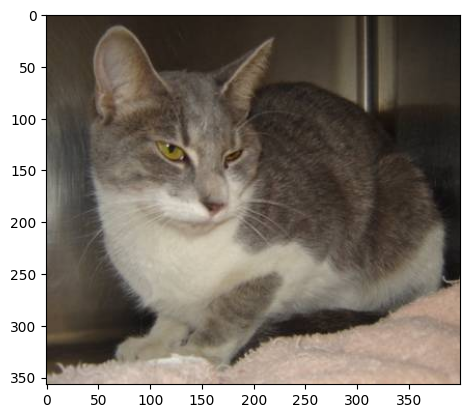

In [40]:
img = mpimg.imread("/content/train/cat.4352.jpg")
imgplt = plt.imshow(img)
plt.show()

#Resizing images

In [41]:
#creating a directory for resized images
os.mkdir('/content/image resized')

FileExistsError: [Errno 17] File exists: '/content/image resized'

In [42]:
original_folder = '/content/train/'
resized_folder = '/content/image resized'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

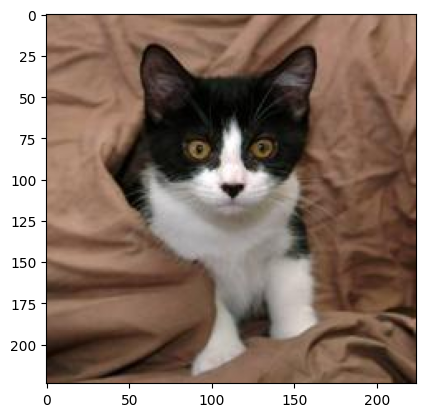

In [45]:
# display resized dog image
img = mpimg.imread('/content/image resized/cat.1002.jpg')
imgplt = plt.imshow(img)
plt.show()

#Create labels for resized images of dogs and cats. 1: dog. 0: cat.

In [46]:
# creating a for loop to assign labels
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [47]:
print(filenames[0:5])
print(len(filenames))

['dog.5444.jpg', 'dog.8384.jpg', 'dog.5872.jpg', 'dog.9848.jpg', 'dog.11407.jpg']
2000


In [48]:
print(labels[0:5])
print(len(labels))

[1, 1, 1, 1, 1]
2000


In [49]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1026  974]


#Converting all the resized images to numpy arrays

In [50]:
import cv2
import glob

In [51]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [52]:
print(dog_cat_images)

[[[[ 91 117 141]
   [124 150 174]
   [ 91 117 141]
   ...
   [126 155 182]
   [121 150 177]
   [106 135 162]]

  [[100 126 150]
   [ 94 120 144]
   [ 79 105 129]
   ...
   [123 152 179]
   [124 153 180]
   [116 145 172]]

  [[130 157 183]
   [114 141 167]
   [111 138 164]
   ...
   [105 134 161]
   [132 161 188]
   [139 168 195]]

  ...

  [[ 61  78 104]
   [ 50  68  91]
   [ 81  98 124]
   ...
   [117 134 147]
   [107 125 136]
   [113 131 142]]

  [[ 50  69  96]
   [ 58  78 103]
   [ 61  80 107]
   ...
   [ 85 107 119]
   [ 93 115 126]
   [115 137 148]]

  [[ 31  52  79]
   [ 76  97 124]
   [ 63  82 109]
   ...
   [ 90 114 126]
   [ 98 123 133]
   [ 89 114 124]]]


 [[[236 238 238]
   [240 242 242]
   [242 244 244]
   ...
   [227 230 228]
   [226 229 227]
   [225 228 226]]

  [[239 241 241]
   [238 240 240]
   [237 239 239]
   ...
   [227 230 228]
   [226 229 227]
   [225 228 226]]

  [[243 245 245]
   [234 236 236]
   [231 233 233]
   ...
   [227 230 228]
   [226 229 227]
   [225 228

In [53]:
type(dog_cat_images)

numpy.ndarray

In [54]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [55]:
X = dog_cat_images
Y = np.asarray(labels)

#Train test split

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [57]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 --> training images

400 --> test images

In [58]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [59]:
print(X_train_scaled)

[[[[0.6627451  0.68235294 0.64705882]
   [0.6627451  0.68235294 0.64705882]
   [0.6627451  0.68235294 0.64705882]
   ...
   [0.68235294 0.71372549 0.6745098 ]
   [0.6745098  0.70588235 0.66666667]
   [0.66666667 0.69803922 0.65882353]]

  [[0.66666667 0.68627451 0.65098039]
   [0.66666667 0.68627451 0.65098039]
   [0.66666667 0.68627451 0.65098039]
   ...
   [0.68627451 0.71764706 0.67843137]
   [0.68235294 0.71372549 0.6745098 ]
   [0.6745098  0.70588235 0.66666667]]

  [[0.67058824 0.69019608 0.65490196]
   [0.67058824 0.69019608 0.65490196]
   [0.67058824 0.69019608 0.65490196]
   ...
   [0.69411765 0.7254902  0.68627451]
   [0.69019608 0.72156863 0.68235294]
   [0.68627451 0.71764706 0.67843137]]

  ...

  [[0.37254902 0.4        0.45882353]
   [0.37647059 0.40392157 0.4627451 ]
   [0.37647059 0.40392157 0.4627451 ]
   ...
   [0.38431373 0.40784314 0.48235294]
   [0.38431373 0.40784314 0.48235294]
   [0.38039216 0.40392157 0.47843137]]

  [[0.38823529 0.41960784 0.47058824]
   [0.3

#**Building the Neural Network**

In [60]:
import tensorflow as tf
import tensorflow_hub as hub

In [61]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [62]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [63]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [64]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 82s 2s/step - loss: 0.2245 - acc: 0.9025
Epoch 2/5
50/50 [==============================] - 56s 1s/step - loss: 0.0682 - acc: 0.9762
Epoch 3/5
50/50 [==============================] - 62s 1s/step - loss: 0.0508 - acc: 0.9844
Epoch 4/5
50/50 [==============================] - 60s 1s/step - loss: 0.0439 - acc: 0.9850
Epoch 5/5
50/50 [==============================] - 56s 1s/step - loss: 0.0327 - acc: 0.9937


In [66]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 17s 1s/step - loss: 0.0741 - acc: 0.9675
Test Loss = 0.07405569404363632
Test Accuracy = 0.9674999713897705


#**Predictive System**

Path of the image to be predicted: /content/Screenshot 2024-01-11 at 14.13.13.png


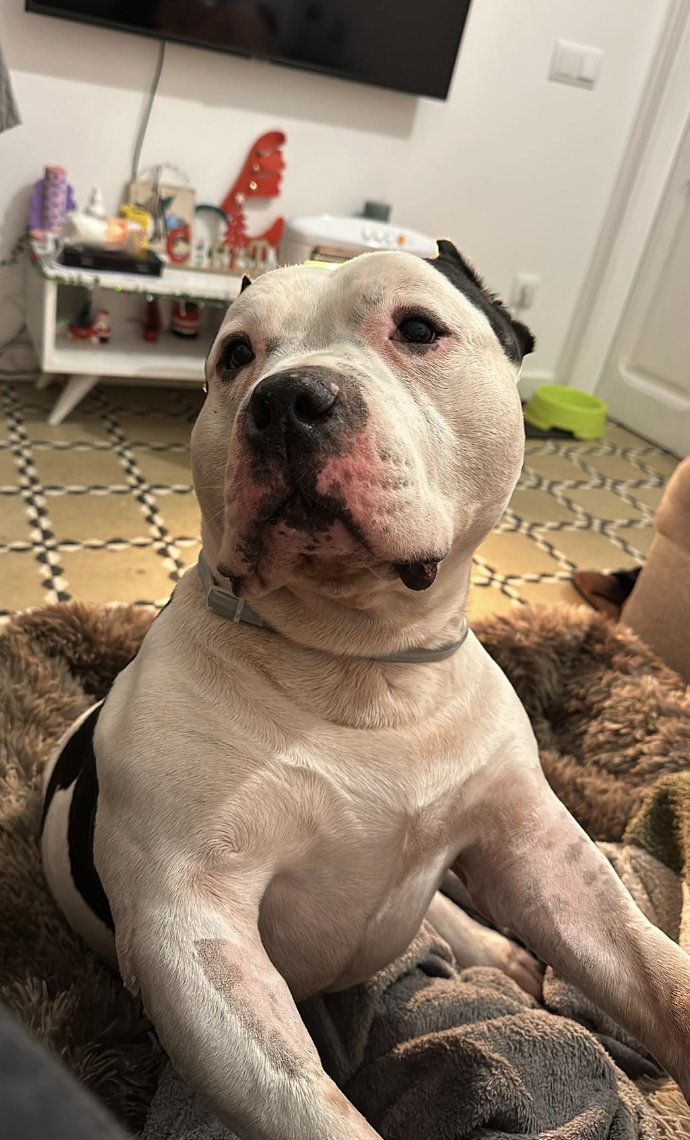

1/1 [==============================] - 1s 691ms/step
[[-0.84120274  3.1739304 ]]
1
The image represents a Dog


In [68]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')